In [ ]:
import pandas as pd
import numpy as np
;
df=pd.read_csv('/content/16k_Movies.csv.zip')
df.head()

,Unnamed: 0,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,0,Dekalog (1988),"Mar 22, 1996",This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama
1,1,Three Colors: Red,"Nov 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,"Drama,Mystery,Romance"
2,2,The Conformist,"Oct 22, 1970","Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",1 h 47 m,Drama
3,3,Tokyo Story,"Mar 13, 1972",Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",2 h 16 m,Drama
4,4,The Leopard (re-release),"Aug 13, 2004","Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...",3 h 7 m,"Drama,History"


In [ ]:
# prompt: encode the  the all the attributes in the given dataset

from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and it contains the attributes you want to encode

le = LabelEncoder()

for column in df.columns:
  if df[column].dtype == object:  # Check if the column contains categorical data
    df[column] = le.fit_transform(df[column])

df.head()

,Unnamed: 0,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,0,3057,2395,13258,7.4,178,4148,6557,229,1421
1,1,13374,3072,8798,8.3,354,4148,6558,69,1542
2,2,11031,3365,10928,7.3,165,768,265,77,1421
3,3,13483,2288,15080,8.1,210,7289,6587,105,1421
4,4,12013,362,10933,7.8,904,4406,3966,193,1477


In [ ]:
# prompt: do data preprecseeing

# Handling missing values (replace with mean, median, or mode)
for column in df.columns:
  if df[column].isnull().any():
    if pd.api.types.is_numeric_dtype(df[column]):
      df[column].fillna(df[column].mean(), inplace=True)
    else:
      df[column].fillna(df[column].mode()[0], inplace=True)


# Feature scaling (if needed)
from sklearn.preprocessing import StandardScaler

# Assuming you want to scale all numerical features
numerical_features = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Feature selection (if needed)
# You can use techniques like correlation analysis or feature importance from tree-based models to identify relevant features

df.head()

<ipython-input-6-e0ea13b79d11>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,Unnamed: 0,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,-1.731944,-1.016012,0.371734,1.294875,0.622536,-1.365334,0.158492,0.074185,4.855455,0.818577
1,-1.731732,1.419558,0.964459,0.275936,1.338673,-0.783835,0.158492,0.074465,-0.330257,1.096631
2,-1.731519,0.866438,1.220985,0.762559,0.542965,-1.408286,-1.423398,-1.685338,-0.070971,0.818577
3,-1.731307,1.445290,0.278053,1.711133,1.179532,-1.259607,1.628526,0.082575,0.836528,0.818577
4,-1.731094,1.098262,-1.408193,0.763702,0.940819,1.033353,0.279240,-0.650374,3.688670,0.947263


Mean Squared Error: 1.8716035450203345
R-squared: 0.07820910576055662


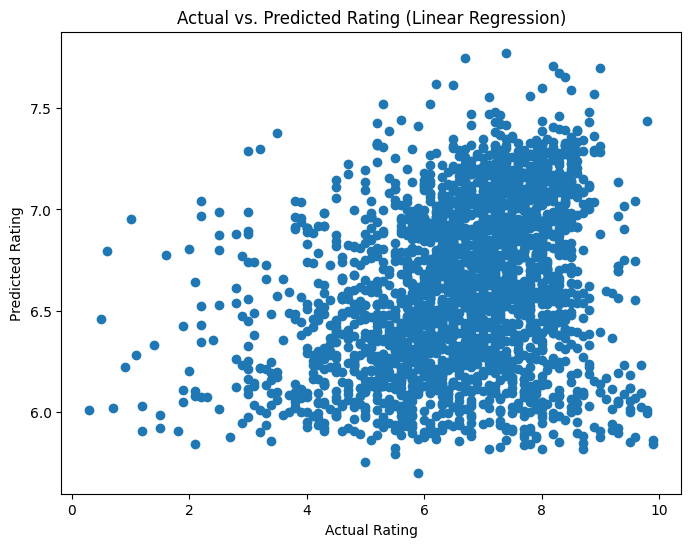

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Instead of LogisticRegression, import LinearRegression for continuous targets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your code to load and preprocess the data) ...

# 1. Ensure all object columns are encoded:
for column in df.columns:
    if df[column].dtype == object:  # Check if the column contains categorical data
        # Convert column to string type to ensure proper encoding
        df[column] = df[column].astype(str)
        df[column] = LabelEncoder().fit_transform(df[column])

# 2. Handle NaN values in the target variable ('Rating'):
# You can either remove rows with NaN values or impute them
# with a suitable value (e.g., mean, median).

# Option 1: Remove rows with NaN in 'Rating'
df.dropna(subset=['Rating'], inplace=True)

# Option 2: Impute NaN with the mean of 'Rating'
# df['Rating'].fillna(df['Rating'].mean(), inplace=True)

# 3. Split data into training and testing sets
X = df.drop('Rating', axis=1)  # Replace 'target_variable' with your actual target column name
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Fit the model and evaluate performance (using Linear Regression):
model = LinearRegression() # Use LinearRegression for continuous target
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate using metrics suitable for regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# You can still visualize the predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs. Predicted Rating (Linear Regression)")
plt.show()

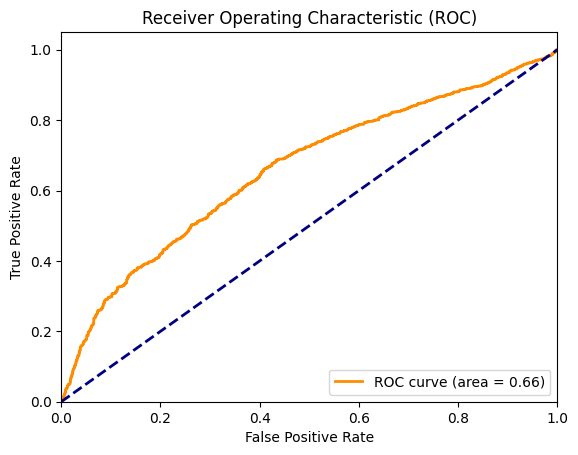

In [ ]:
# prompt: do roc and plt the graph

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred from your model

# For ROC curve, you need predicted probabilities for the positive class
# If your model doesn't output probabilities directly, you might need to use
# a sigmoid function to convert the output to probabilities
# For example, if your model outputs scores:
# y_pred_proba = sigmoid(y_pred)

# If your model already outputs probabilities, you can use it directly
# y_pred_proba = y_pred

# Assuming you have y_pred_proba with probabilities

# Convert target variable to binary classification
y_test_binary = (y_test >= y_test.median()).astype(int)

# Calculate the false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# prompt: do logistic regression according to above dataset

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np # Import numpy

# Assuming 'target_variable' is the column you want to predict
# Replace 'target_variable' with the actual name of your target variable
X = df.drop('Rating', axis=1)
# Convert 'Rating' to discrete values. Here, we're creating 2 classes:
# Ratings below the median are class 0, and ratings above or equal to the median are class 1.
y = np.where(df['Rating'] >= df['Rating'].median(), 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.6792510742786986
              precision    recall  f1-score   support

           0       0.61      0.36      0.45      1195
           1       0.70      0.86      0.77      2063

    accuracy                           0.68      3258
   macro avg       0.65      0.61      0.61      3258
weighted avg       0.67      0.68      0.66      3258



Confusion Matrix:
[[955 298]
 [708 609]]


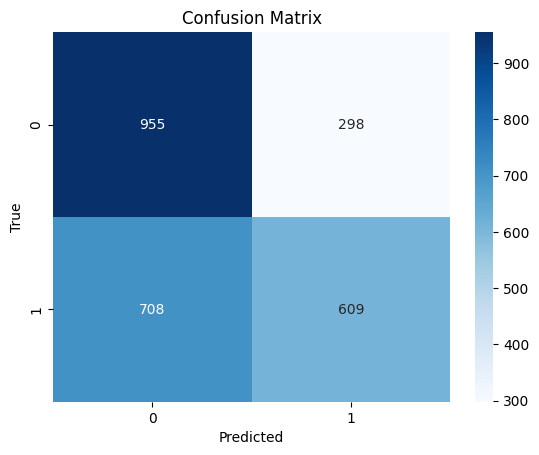

In [ ]:
# prompt: do logitic regression confusion matrix according the datset

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred from your logistic regression model
# Convert the continuous target to binary for creating a confusion matrix
# Here, we're using the median as the threshold
y_test_binary = (y_test >= y_test.median()).astype(int)
y_pred_binary = (y_pred >= y_test.median()).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# prompt: do   k-Nearest Neighbors according to above dataset

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# ... (Your existing code for data loading, preprocessing, and handling missing values) ...


# Assuming 'target_variable' is the column you want to predict
# Replace 'target_variable' with the actual name of your target variable
X = df.drop('Rating', axis=1)
# Convert 'Rating' to discrete values. Here, we're creating 2 classes:
# Ratings below the median are class 0, and ratings above or equal to the median are class 1.
y = np.where(df['Rating'] >= df['Rating'].median(), 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the k-Nearest Neighbors model
k = 5  # Choose the number of neighbors (you can experiment with different values)
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.6740331491712708
              precision    recall  f1-score   support

           0       0.56      0.49      0.53      1195
           1       0.73      0.78      0.75      2063

    accuracy                           0.67      3258
   macro avg       0.64      0.64      0.64      3258
weighted avg       0.67      0.67      0.67      3258



Accuracy: 0.7206875383670964
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1971
           1       0.62      0.76      0.68      1287

    accuracy                           0.72      3258
   macro avg       0.72      0.73      0.72      3258
weighted avg       0.74      0.72      0.72      3258



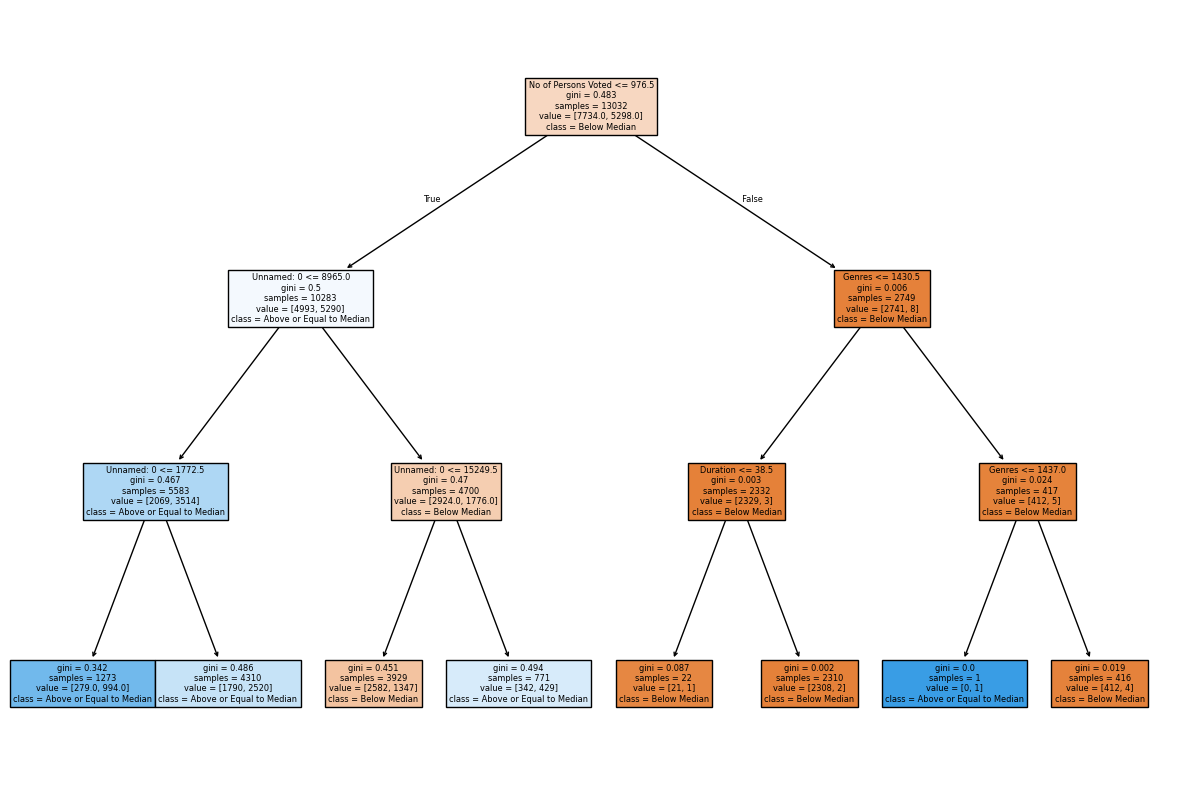

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.preprocessing import LabelEncoder


# Load your dataset into a Pandas DataFrame called 'df'
# **Change the file path to the correct location of your data file.**
# If the file is in the same directory as the notebook, you can simply use '16k_Movies.csv.zip'.
# If the file is in a subdirectory called 'data', you would use 'data/16k_Movies.csv.zip'
df = pd.read_csv('16k_Movies.csv.zip')  # Assuming your data is in a ZIP file

# Assuming 'target_variable' is the column you want to predict
# Replace 'target_variable' with the actual name of your target variable
# Before dropping 'Rating', identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop('Rating', axis=1)
# Convert 'Rating' to discrete values. Here, we're creating 2 classes:
# Ratings below the median are class 0, and ratings above or equal to the median are class 1.
y = np.where(df['Rating'] >= df['Rating'].median(), 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
model = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth for tree complexity
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['Below Median', 'Above or Equal to Median'], filled=True)
plt.show()

In [ ]:
# prompt: do decision tree accodring to above dataset h


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# ... (Your existing code for data loading, preprocessing, and handling missing values) ...

# Assuming 'target_variable' is the column you want to predict
# Replace 'target_variable' with the actual name of your target variable
X = df.drop('Rating', axis=1)
# Convert 'Rating' to discrete values. Here, we're creating 2 classes:
# Ratings below the median are class 0, and ratings above or equal to the median are class 1.
y = np.where(df['Rating'] >= df['Rating'].median(), 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)  # You can adjust parameters like max_depth, min_samples_split, etc.
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7341927562922038
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1195
           1       0.79      0.79      0.79      2063

    accuracy                           0.73      3258
   macro avg       0.71      0.71      0.71      3258
weighted avg       0.73      0.73      0.73      3258



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset, change file path to the correct location
# If it's in the current directory, just use the file name:
# df = pd.read_csv('16k_Movies.csv.zip')
# Or, if it's in a subdirectory, adjust the path accordingly
df = pd.read_csv('16k_Movies.csv.zip')  # Replace '16k_Movies.csv.zip' with the actual file name and path if it's not in the current directory


# Label movies as "Recommend" (rating >= 4) or "Not Recommend" (rating < 4)
# Assuming 'Rating' is the column containing movie ratings
# The error was here: 'rating' was incorrect; it should be 'Rating' (case-sensitive)
df['recommend'] = df['Rating'].apply(lambda x: 1 if x >= 4 else 0)

# Features: You can include more features like genres, cast, etc.
X = df[['Title', 'Genres']]
y = df['recommend']

# Encode userId and movieId
le_user = LabelEncoder()
le_movie = LabelEncoder()

X['Title'] = le_user.fit_transform(X['Title'])
X['Genres'] = le_movie.fit_transform(X['Genres'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = mlp_model.predict(X_test_scaled)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

<ipython-input-17-c448a407b4cf>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Title'] = le_user.fit_transform(X['Title'])
<ipython-input-17-c448a407b4cf>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Genres'] = le_movie.fit_transform(X['Genres'])


Confusion Matrix:
[[   0  822]
 [   0 2436]]
Accuracy: 0.7476979742173112
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       822
           1       0.75      1.00      0.86      2436

    accuracy                           0.75      3258
   macro avg       0.37      0.50      0.43      3258
weighted avg       0.56      0.75      0.64      3258



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
[[   0  822]
 [   0 2436]]


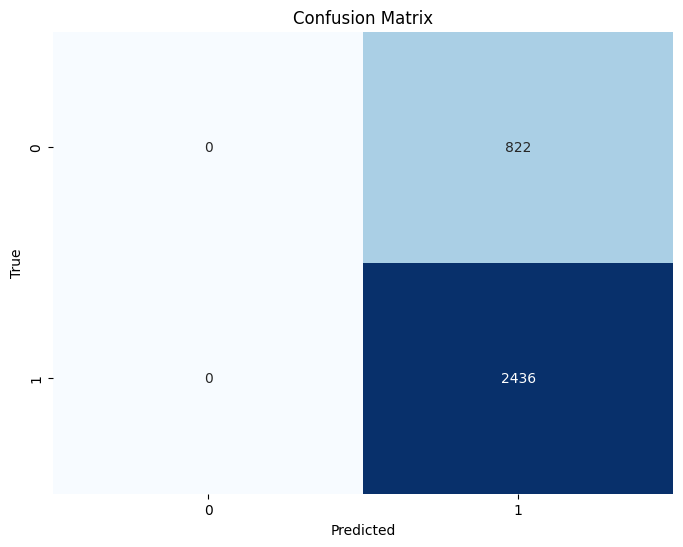

In [ ]:
# prompt: PLOT THE GRAPH FOR ABOVE CONFUSION MATRIX

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_test and y_pred from your model

# Convert the continuous target to binary for creating a confusion matrix
# Here, we're using the median as the threshold
y_test_binary = (y_test >= y_test.median()).astype(int)
y_pred_binary = (y_pred >= y_test.median()).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# prompt: do random forest accoding to above dataset

from sklearn.ensemble import RandomForestClassifier

# ... (Your existing code for data loading, preprocessing, and handling missing values) ...

# Assuming 'target_variable' is the column you want to predict
# Replace 'target_variable' with the actual name of your target variable
X = df.drop('Rating', axis=1)
# Convert 'Rating' to discrete values. Here, we're creating 2 classes:
# Ratings below the median are class 0, and ratings above or equal to the median are class 1.
y = np.where(df['Rating'] >= df['Rating'].median(), 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust parameters like n_estimators, max_depth, etc.
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7725598526703499
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1195
           1       0.82      0.81      0.82      2063

    accuracy                           0.77      3258
   macro avg       0.76      0.76      0.76      3258
weighted avg       0.77      0.77      0.77      3258



In [ ]:
import pandas as pd
import numpy as np  # Import NumPy
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder # Import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier # import for RandomForestClassifier
from sklearn.metrics import confusion_matrix # import confusion_matrix for creating confusion matrix
from sklearn.compose import ColumnTransformer # Import ColumnTransformer for applying transformers to different columns
import seaborn as sns # import seaborn for creating heatmap of confusion matrix
import matplotlib.pyplot as plt # import pyplot for plotting

# Load your data into a Pandas DataFrame
# Replace 'your_data.csv' with the actual path to your data file
df = pd.read_csv('/content/16k_Movies.csv.zip') # Assuming your data is in a CSV file named 'your_data.csv'
# If your data is in a different format (e.g., Excel), use the appropriate function like pd.read_excel()

# ... (Your existing code for data loading, preprocessing, and handling missing values) ...

# Assuming 'target_variable' is the column you want to predict
# Replace 'target_variable' with the actual name of your target variable
X = df.drop('Rating', axis=1)
# Convert 'Rating' to discrete values. Here, we're creating 2 classes:
# Ratings below the median are class 0, and ratings above or equal to the median are class 1.
y = np.where(df['Rating'] >= df['Rating'].median(), 1, 0) # using np.where for data preprocessing

# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create a ColumnTransformer to handle numerical and categorical features separately
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns.tolist()), # Apply StandardScaler to numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features), # Apply OneHotEncoder to categorical features
    ])

# Preprocess the data
X = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust parameters like n_estimators, max_depth, etc.
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # create heatmap of confusion matrix
plt.xlabel('Predicted') # x-axis label
plt.ylabel('True') # y-axis label
plt.title('Confusion Matrix for Random Forest') # title of plot
plt.show() # display plot

In [ ]:
# prompt: do  Support Vector Machines accoding to above dataset

# ... (Your existing code for data loading, preprocessing, and handling missing values) ...

# Assuming 'target_variable' is the column you want to predict
# Replace 'target_variable' with the actual name of your target variable
X = df.drop('Rating', axis=1)
# Convert 'Rating' to discrete values. Here, we're creating 2 classes:
# Ratings below the median are class 0, and ratings above or equal to the median are class 1.
y = np.where(df['Rating'] >= df['Rating'].median(), 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import SVC from scikit-learn
from sklearn.svm import SVC

# Create and train the Support Vector Machine model
model = SVC(kernel='linear', random_state=42)  # You can experiment with different kernels (e.g., 'rbf', 'poly')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.6829343155310006
              precision    recall  f1-score   support

           0       0.61      0.37      0.46      1195
           1       0.70      0.87      0.78      2063

    accuracy                           0.68      3258
   macro avg       0.66      0.62      0.62      3258
weighted avg       0.67      0.68      0.66      3258



In [ ]:
# prompt:  do Naive Bayes according to above dataset

# ... (Your existing code for data loading, preprocessing, and handling missing values) ...

# Assuming 'target_variable' is the column you want to predict
# Replace 'target_variable' with the actual name of your target variable
X = df.drop('Rating', axis=1)
# Convert 'Rating' to discrete values. Here, we're creating 2 classes:
# Ratings below the median are class 0, and ratings above or equal to the median are class 1.
y = np.where(df['Rating'] >= df['Rating'].median(), 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import GaussianNB from scikit-learn
from sklearn.naive_bayes import GaussianNB

# Create and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.6838551258440762
              precision    recall  f1-score   support

           0       0.58      0.49      0.53      1195
           1       0.73      0.80      0.76      2063

    accuracy                           0.68      3258
   macro avg       0.66      0.64      0.65      3258
weighted avg       0.68      0.68      0.68      3258



Accuracy: 0.6190661478599222
              precision    recall  f1-score   support

           0       0.60      0.64      0.62      1253
           1       0.64      0.60      0.62      1317

    accuracy                           0.62      2570
   macro avg       0.62      0.62      0.62      2570
weighted avg       0.62      0.62      0.62      2570

Confusion Matrix:
[[807 446]
 [533 784]]


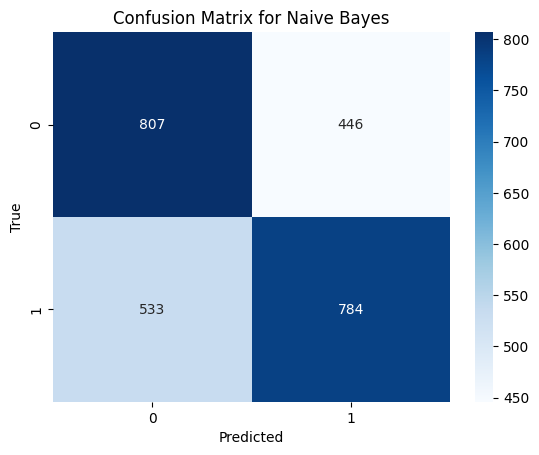

In [ ]:
# prompt:  do Naive Bayes according to above dataset

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # Import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code for data loading, preprocessing, and handling missing values) ...

# Assuming 'target_variable' is the column you want to predict
# Replace 'target_variable' with the actual name of your target variable
X = df.drop('Rating', axis=1)
# Convert 'Rating' to discrete values. Here, we're creating 2 classes:
# Ratings below the median are class 0, and ratings above or equal to the median are class 1.
y = np.where(df['Rating'] >= df['Rating'].median(), 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

Accuracy: 0.91


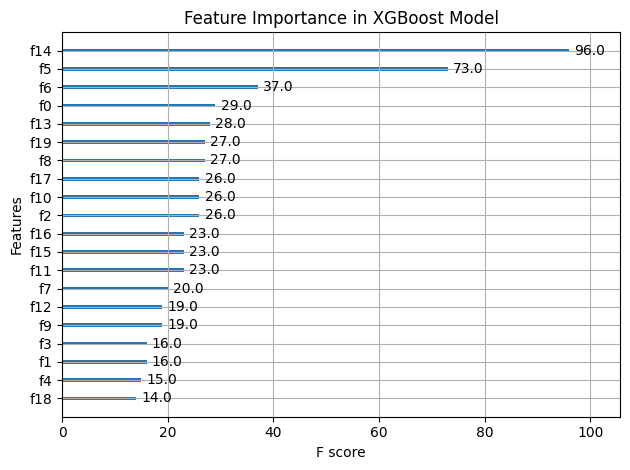

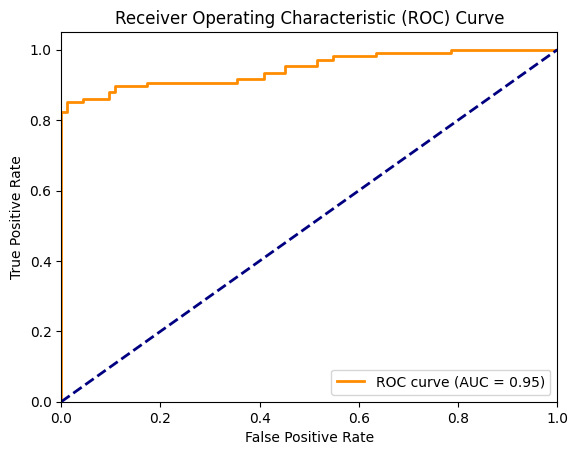

In [ ]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'max_depth': 3,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions
y_pred = model.predict(dtest)
y_pred_binary = [1 if y > 0.5 else 0 for y in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

# Plot feature importance
xgb.plot_importance(model)
plt.title('Feature Importance in XGBoost Model')
plt.tight_layout()
plt.show()

# Plot the ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming your DataFrame is already loaded into 'df'
# For example, df = pd.read_csv('your_data.csv')

# Create feature (X) and target (y) variables
X = df.drop('Rating', axis=1)

# Convert 'Rating' into two classes: ratings above or equal to median are 1 (liked), others are 0 (disliked)
y = np.where(df['Rating'] >= df['Rating'].median(), 1, 0)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Function to predict the rating based on user input
def predict_movie_rating(user_input, df):
    # Convert the user input into a DataFrame for easier processing
    input_df = pd.DataFrame([user_input])

    # One-hot encode categorical features like 'Genres'
    input_encoded = pd.get_dummies(input_df, columns=['Genres'], drop_first=True)

    # Align input columns with the columns in the training dataset
    feature_columns = df.drop('Rating', axis=1).columns
    missing_cols = set(feature_columns) - set(input_encoded.columns)
    for col in missing_cols:
        input_encoded[col] = 0  # Fill missing columns with 0

    # Ensure the columns are in the same order as the training set
    input_encoded = input_encoded[feature_columns]

    # Predict the class using the model
    predicted_rating_class = model.predict(input_encoded.values)

    return predicted_rating_class

# Function to take user inputs dynamically
def get_user_input():
    release_date = int(input("Enter the movie's release year (e.g., 2019): "))
    no_of_persons_voted = int(input("Enter the number of persons who voted: "))
    duration = int(input("Enter the movie duration (in minutes): "))
    genre = input("Enter the movie genre (e.g., Action, Comedy, Drama): ")

    # Creating a dictionary for the input
    user_input = {
        'Release Date': release_date,
        'No of Persons Voted': no_of_persons_voted,
        'Duration': duration,
        'Genres': genre
    }

    return user_input

# Example usage: Collect input from the user and predict the movie rating
user_input = get_user_input()
predicted_rating = predict_movie_rating(user_input, df)
print("Predicted Rating Class (Liked/Disliked):", "Liked" if predicted_rating == 1 else "Disliked")


Enter the movie's release year (e.g., 2019): 2023
Enter the number of persons who voted: 9
Enter the movie duration (in minutes): 3
Enter the movie genre (e.g., Action, Comedy, Drama): Action
Predicted Rating Class (Liked/Disliked): Liked


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
